In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
columns = ['Artist', 'Title', 'Album', '#_of_views', 'Release_date', '#_feat_artists', 'Artist_pop', 'Genre', 
           'Followers', 'Danceability', 'Energy', 'Valence', 'Duration', 'Loudness', '#_words', 'Lyrics']
data = pd.read_csv('lyricDataset.scv', names = columns)

Based on the greatest similarity between track titles, the data from Spotify was concatenated to the current Genius dataset. Now the dataset has additional features from Spotify. Some of the feature descriptions are grabbed straight from the Spotify API. The full list of features are as follow:<br>

1. 'Artist' - Song artist<br>
DESCRIPTION: Name of artist
2. 'Title' - Song title<br>
DESCRIPTION: Name of song
3. 'Album' - Album Title<br>
DESCRIPTION: Name of album the song is from.
4. '#_of_views' - Number of pageviews for the lyric<br>
DESCRIPTION: Amount of views the lyric page got on the Genius website.
5. 'Release_date' - Release date of song<br>
DESCRIPTION: The date the song was released
6. '#_feat_artists' - How many featured artists<br>
DESCRIPTION: The amount of artists featured on song
7. 'Artist_pop' - Artist Popularity<br>
DESCRIPTION: How popular an artist is on Spotify. Range is 0-100.
8. 'Genre' - Genre(s)<br>
DESCRIPTION: Genre the artist is considered as, separated by ' / '.
9. 'Followers'<br>
DESCRIPTION: The amount of users following an artist on Spotify
10. 'Danceability'<br>
DESCRIPTION: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. (Gotten from Spotify)
11. 'Energy'<br>
DESCRIPTION: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
12. 'Valence'<br>
DESCRIPTION: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
13. 'Duration' - Duration (in Milliseconds)<br>
DESCRIPTION: The length of the song in milliseconds
14. 'Loudness'<br>
DESCRIPTION: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
15. '#_words' - Total words in lyrics<br>
DESCRIPTION: How many words each lyric has.
16. 'Lyrics'<br>
DESCRIPTION: The lyrics for the specific song.

In [3]:
data.shape

(1580, 16)

In [4]:
data.isnull().sum()

Artist             0
Title              0
Album             21
#_of_views         0
Release_date      87
#_feat_artists     0
Artist_pop         0
Genre             20
Followers          0
Danceability       0
Energy             0
Valence            0
Duration           0
Loudness           0
#_words            0
Lyrics             1
dtype: int64

In [5]:
data[data['Genre'].isnull()]

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics
1160,Gavlyn,What I Do,From the Art,53005,2009-01-01,0,43,NaN,33583,0.494,0.858,0.335,190068,-3.965,401,Yeah\nOh - man it's like...\nIt's beautiful h...
1161,Gavlyn,Why Don’t You Do Right,From the Art,11409,2012-10-02,0,43,NaN,33583,0.649,0.810,0.284,175570,-7.885,341,Why don't you do right?\nLike some other men d...
1162,Gavlyn,Guilty Pleasure,Modest Confidence,8157,2013-10-14,0,43,NaN,33583,0.374,0.814,0.628,200830,-5.763,442,A culture shock to put it in words\nYou might...
1163,Gavlyn,We On,Headspace,6039,2017-01-20,0,43,NaN,33583,0.478,0.606,0.259,187774,-6.865,514,Ayo we on peace to those that say we not\nAyo...
1164,Gavlyn,All Too Well,Modest Confidence,0,2014-01-17,0,43,NaN,33583,0.577,0.807,0.349,196599,-4.776,411,Alright\nYeah yeah yeah\nQuick to say the ob...
1165,Gavlyn,Clarity/To the Feeling,From the Art,0,2012-10-02,0,43,NaN,33583,0.478,0.944,0.694,153836,-5.335,596,Clarity/To the Feeling\nYeah from the art\nGa...
1166,Gavlyn,Needs,Headspace,0,2017-08-08,0,43,NaN,33583,0.774,0.663,0.281,196805,-5.271,351,How can I focus on your whereabouts\nWhen I'm ...
1167,Gavlyn,Clarity,From the Art,0,2012-10-02,0,43,NaN,33583,0.713,0.677,0.786,192811,-5.252,474,Ugh yea\nFrom the art\nGavlyn\nAnd it's that ...
1168,Gavlyn,Looking Back,Headspace,0,2018-03-05,2,43,NaN,33583,0.521,0.738,0.534,279614,-5.135,802,Hey yo what's up Vel and Rev man\nIt's been a...
1169,Gavlyn,Staring Problem,From the Art,0,2012-10-02,0,43,NaN,33583,0.699,0.929,0.667,188945,-4.057,474,Damn man\nWhat the fuck are you looking at?\nY...


All missing Genre from the same artist Gavlyn. And he is known as a hip hop artist. So we can fill the missing values

In [6]:
data['Genre'].fillna('hip hop', inplace = True)

In [7]:
data[data['Lyrics'].isnull()]

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics
32,In Hearts Wake,Ark,Ark,0,2017-04-24,0,50,australian metalcore / melodic metalcore / met...,88252,0.339,0.415,0.204,70002,-16.547,0,NaN


The missing lyrics from the only one song and this song is instrumental, so we just drop it.

In [8]:
data.dropna(subset = ['Lyrics'], inplace = True)
data.reset_index(drop = True, inplace = True)

In [9]:
data.shape

(1579, 16)

<br>
now we will prepare 'Lyrics' column for sentimental analysis

In [10]:
 data['Lyrics'] = data['Lyrics'].astype(str)

In [11]:
str_array = data['Lyrics'].to_numpy()
length = len(str_array)
for i in range(length):
    str_array[i] = str_array[i].lower().translate(string.punctuation).replace('+', ' ').replace('\\', '').replace('"', '')

Do sentimental analysis and put result in a new column 'Sent'

In [12]:
sent_result = np.empty(length)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for i in range(length):
    sent_result[i] = analyzer.polarity_scores(str_array[i])['compound']

In [13]:
tempo = pd.Series(sent_result)
data = data.assign(Sent = tempo)

In [14]:
data.head(1)

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics,Sent
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,74,contemporary country / country / country dawn ...,2184569,0.568,0.562,0.247,240280,-7.775,233,sting of the needle dropping on a vinyl neon s...,0.9311


<br>
We will try to find correlation of 'Danceability', 'Energy', 'Valence' and 'Loudness'

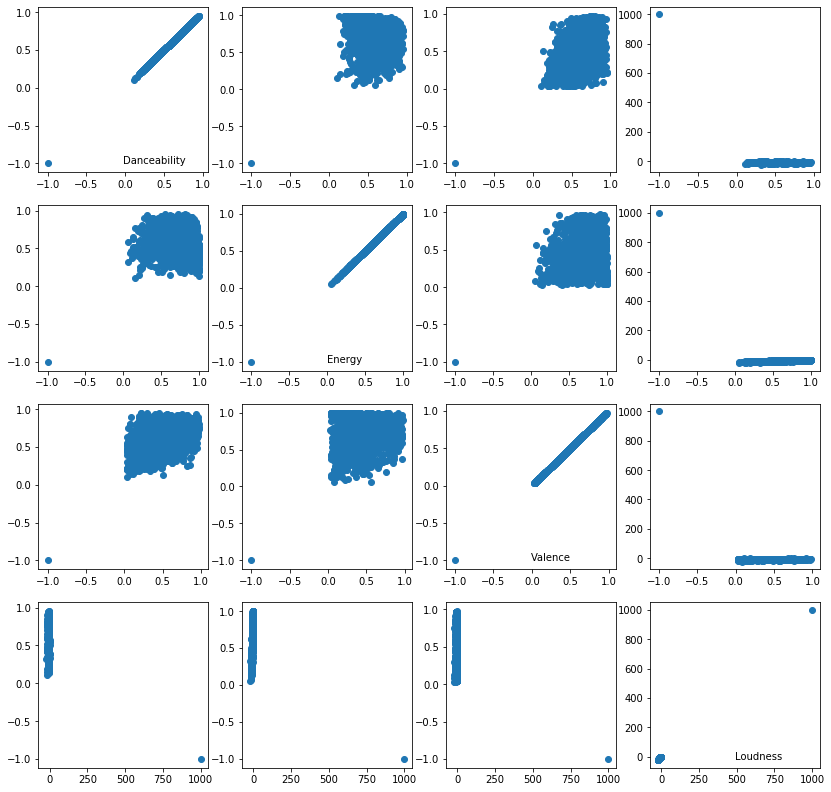

In [15]:
plt.figure(figsize = (14, 14))
data_names = ['Danceability', 'Energy', 'Valence', 'Loudness']
for i in range(16):
    plt.subplot(4, 4, i + 1)
    x = i // 4
    y = i % 4

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

All mentioned above features have outliers.<br>

In [16]:
data['Danceability'].describe()

count    1579.000000
mean        0.578511
std         0.173039
min        -1.000000
25%         0.464000
50%         0.575000
75%         0.701000
max         0.953000
Name: Danceability, dtype: float64

In [17]:
data[data['Danceability'] < 0]

,Artist,Title,Album,#_of_views,Release_date,#_feat_artists,Artist_pop,Genre,Followers,Danceability,Energy,Valence,Duration,Loudness,#_words,Lyrics,Sent
80,Tame Impala,Let It Happen,Currents,454385,2015-03-11,0,88,australian psych / neo-psychedelic,3352582,-1.0,-1.0,-1.0,0,999.0,265,it's always around me all this noise but not ...,0.9853


Seems like this is the line which has all corrupted data. We will drop it

In [18]:
data.drop(80, inplace = True)
data.reset_index(drop = True, inplace = True)

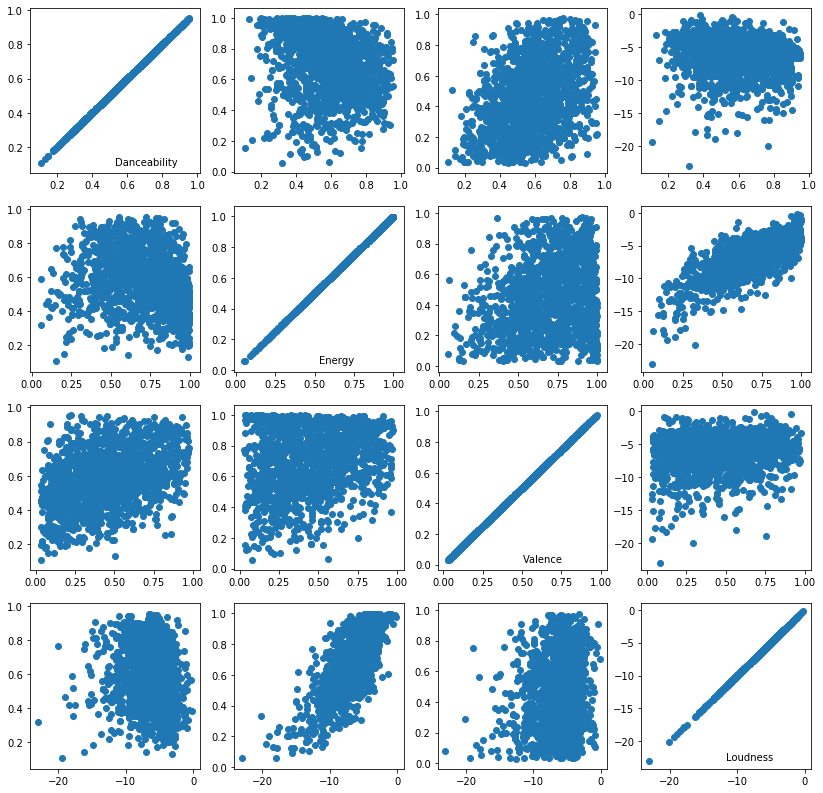

In [19]:
plt.figure(figsize = (14, 14))
data_names = ['Danceability', 'Energy', 'Valence', 'Loudness']
for i in range(16):
    plt.subplot(4, 4, i + 1)
    x = i // 4
    y = i % 4

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

We have good correlation between 'Energy' and 'Loudness'<br>
<br>
Now we will add sentimental analysis results

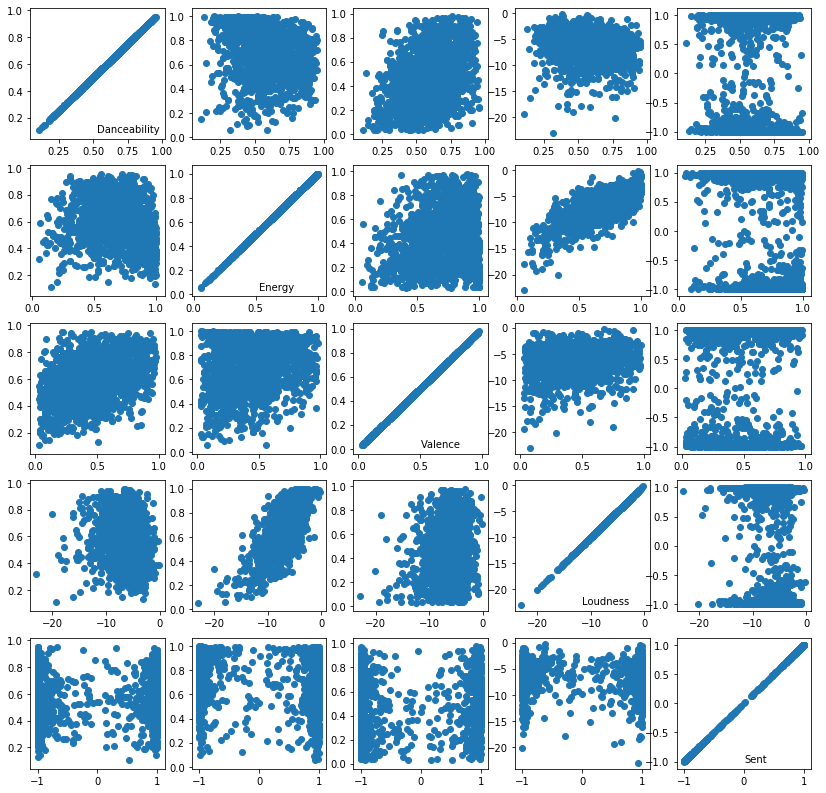

In [20]:
plt.figure(figsize = (14, 14))
data_names = ['Danceability', 'Energy', 'Valence', 'Loudness', 'Sent']
for i in range(25):
    plt.subplot(5, 5, i + 1)
    x = i // 5
    y = i % 5

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

Looks like sentimental analysis does not correlate with any of these features<br>
<br>
Now we will compare number of pageviews, artist popularity, number of followers, duration of the song and amount of words in the song

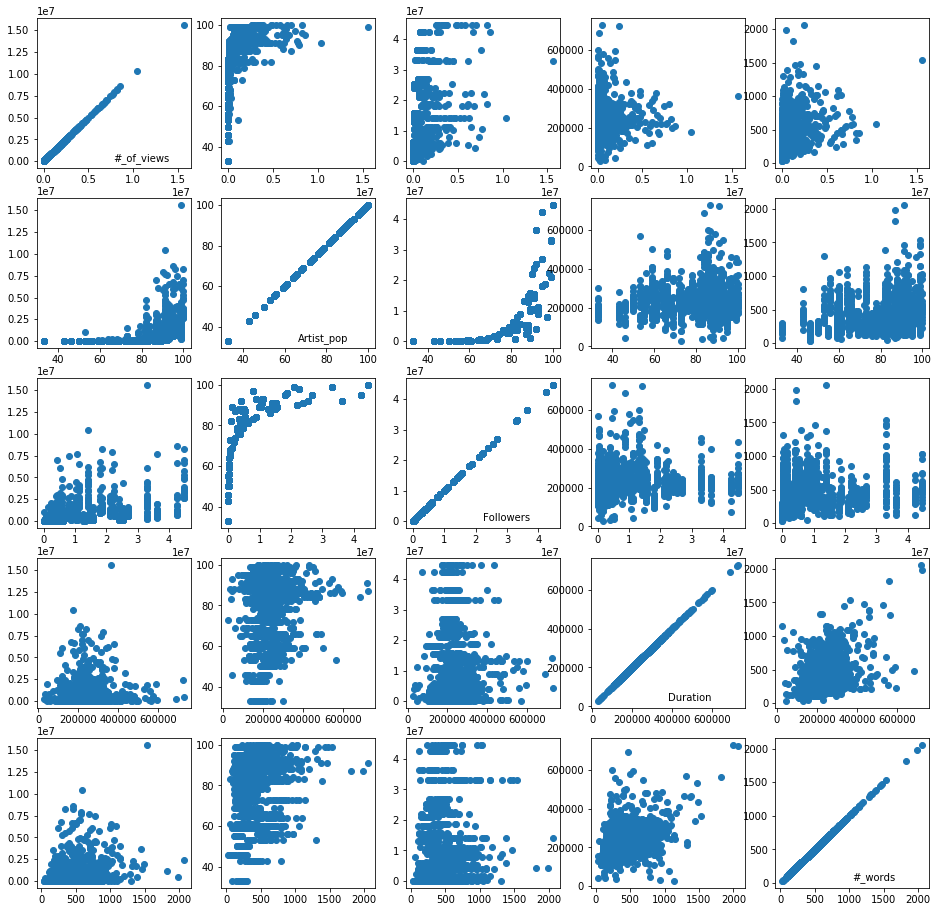

In [21]:
plt.figure(figsize = (16, 16))
data_names = ['#_of_views', 'Artist_pop', 'Followers', 'Duration', '#_words']
for i in range(25):
    plt.subplot(5, 5, i + 1)
    x = i // 5
    y = i % 5

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

Number of words and song's duration has some correlation, but it's quite obvious.<br>
The more interesting correlation is between Artist popularity and (Number of pageviews, Followers).<br>
As we can see as soon the popularyty of the artist gets close to 80 amount of page vizits and followers incrreases rapidly. And we can se that Followers and Pageviews are independent from each other. We can  assume that 80 popularity is a sort of starting point of the wide public interest.<br>
<br>
Now we mix some 'interesting' features together

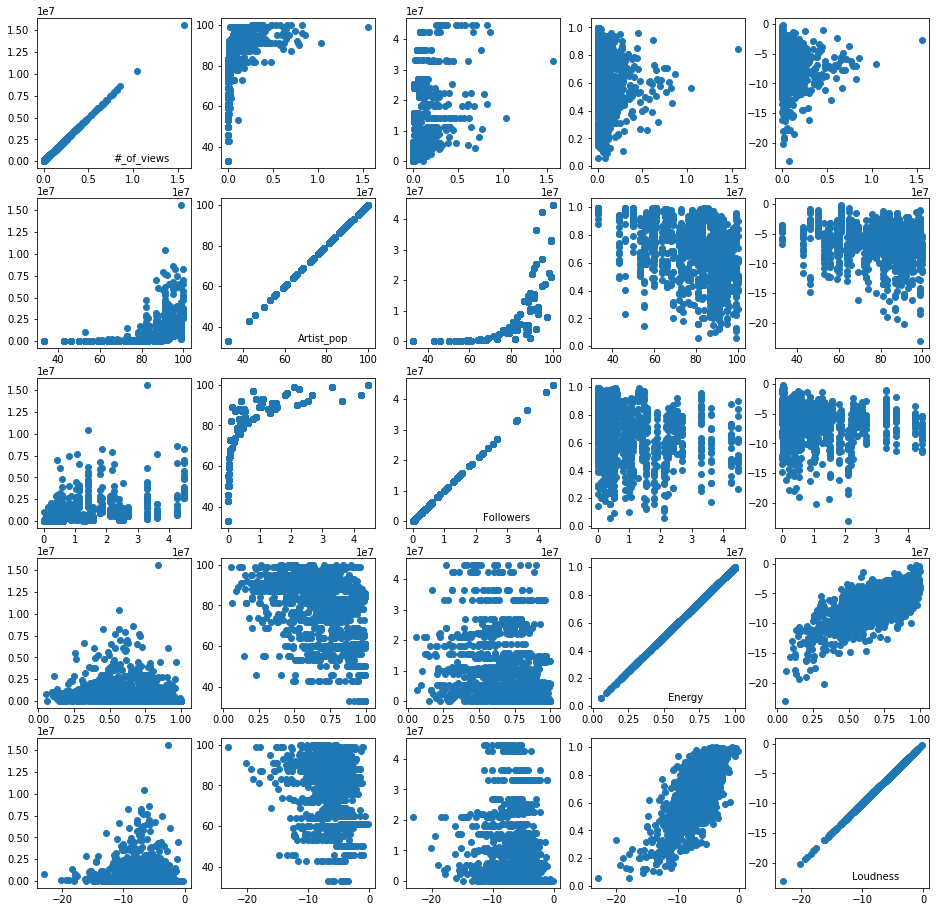

In [22]:
plt.figure(figsize = (16, 16))
data_names = ['#_of_views', 'Artist_pop', 'Followers', 'Energy', 'Loudness']
for i in range(25):
    plt.subplot(5, 5, i + 1)
    x = i // 5
    y = i % 5

    plt.scatter(data[data_names[x]], data[data_names[y]])
    if x == y:
        plt.annotate(data_names[x], xy=(0.5, 0.05), xycoords='axes fraction')

We can see there is some dependency between pageviews and ('energy', 'loudness').<br>
Higher pageview rating with songs where energy and loudnes a little bit above average